In [4]:
from sklearn import svm, linear_model, neighbors, ensemble
from sklearn import cross_validation
from sklearn import datasets
import numpy as npes
import pandas as pd
from matplotlib import pylab as plt
import time
%matplotlib inline

# Support vector machines (SVM)
SVM is a method that is widely used in classification and regression tasks. The most important feature of svm is that it try to find a decision boundary which separates classes with eqaul distance. SVM decision boundaries are as wide as possible so that's why sometimes this method is called widest street approach, or large margin classifier.

SVM has another nice properties such as it is convex, theoretically motivated, nonlinear with kernels.

Let's have a look at the space shown below.

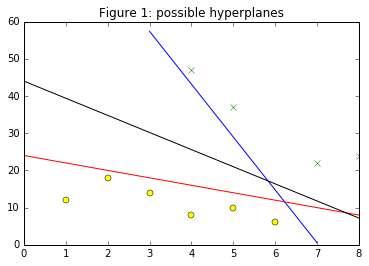

In [7]:
x1 = [1, 2, 3, 4, 5, 6]
y1 = [12, 18, 14, 8, 10, 6]

x2 = [4, 5, 7, 8]
y2 = [47, 37, 22, 24]
plt.plot(x1, y1, "o", color="yellow")
plt.plot(x2, y2, "x", color="green")

plt.plot(range(3, 8),[ i * (-14.2) + 100 for i in range(3, 8)], color="blue")
#plt.plot(range(12),[ i * - 4.4 + 45 for i in range(12)], color="blue")
plt.plot(range(9),[ i * - 2.0 + 24 for i in range(9)], color="red")
plt.plot(range(9),[ i * - 4.6 + 44 for i in range(9)], color="k")

plt.title("Figure 1: possible hyperplanes")

As it can be seen, both of the lines separates the classes perfectly. What's more, we can draw more than two straight line still separating perfectly. But only one of them will give us the minimum misclassification error. So which line is that?

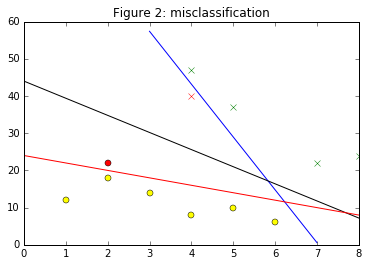

In [11]:
x1 = [1, 2, 3, 4, 5, 6]
y1 = [12, 18, 14, 8, 10, 6]

x2 = [4, 5, 7, 8]
y2 = [47, 37, 22, 24]
plt.plot(x1, y1, "o", color="yellow")
plt.plot(x2, y2, "x", color="green")
plt.plot([4], [40], "x", color="red")
plt.plot([2], [22], "o", color="red")

plt.plot(range(3, 8),[ i * (-14.2) + 100 for i in range(3, 8)], color="blue")
plt.plot(range(9),[ i * - 4.6 + 44 for i in range(9)], color="k")
plt.plot(range(9),[ i * - 2.0 + 24 for i in range(9)], color="red")
plt.title("Figure 2: misclassification")

Since the red and blue lines are too close to the classes, they are prone to misclassification. But the black one that has the largest margin from the both classes does better job at classification.

So next quiestion is how do we get the black line?

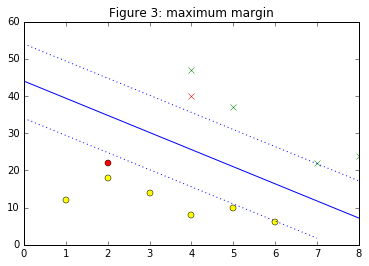

In [13]:
x1 = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
y1 = [12.0, 18.0, 14.0, 8.0, 10.0, 6.0]

x2 = [4, 5, 7, 8]
y2 = [47, 37, 22, 24]
plt.plot(x1, y1, "o", color="yellow")
plt.plot(x2, y2, "x", color="green")

plt.plot([4], [40], "x", color="red")
plt.plot([2], [22], "o", color="red")

plt.plot(range(9),[ i * - 4.6 + 54 for i in range(9)], ":", color="blue")
plt.plot(range(9),[ i * - 4.6 + 44 for i in range(9)], color="blue")
plt.plot(range(8),[ i * - 4.6 + 34 for i in range(8)], ":", color="blue")
plt.title("Figure 3: maximum margin")

Let w is a vector perpendicular to the median line. But we do not kow its length yet. And u is an unknown example. We project the u vector down on to the w vector so that we have a distance. It goes futher out, it ends up on the right side of the street. Or it is a short distance which means it is on the left side. So we can formulate it like this:

$$ \vec{w}  \cdot \vec{u} \geq c $$
or can be rewritten as: $$ c = -b $$ 
$$ \vec{w}  \cdot \vec{u}_{+} + b \geq 1 \ \ \ {{for + samples}}$$
$$ \vec{w}  \cdot \vec{u}_{-} + b \leq -1 \ \ \ {{for - samples}}$$
to make it mathematically convenient, reformulate it as:
$$ y \in \left \{ -1, 1 \right \} \ \ \  and \ \ \  y(\vec{w}  \cdot \vec{u} + b) + 1 = 0 $$
It is equal to 0 when the sample is on the street. 


$$ width\ of\ the\ street = (\vec{x}_{+} - \vec{x}_{-}) \cdot \frac{\vec{w}}{\left \| \vec{w} \right \|}$$
$$ width\ of\ the\ street =  \frac{2}{\left \| \vec{w} \right \|}$$

So we want to maximize the margin, or the minimize the following: 
$$ \frac{1}{2} \left \| \vec{w} \right \|^{2} $$

So far, we've come up with the two constraints. By using **Lagrange multipliers**, we can get a formula which gives maximum/minimum without thinking about the constraints anymore. 

$$ L = \frac{1}{2} \left \| \vec{w} \right \|^{2}  - 
\sum \lambda \left [  y_{i} (\vec{w} \cdot \vec{x_{i}+b} - 1 )  \right ] $$
After takin the derivates of L with respect to w and b:
$$ \frac{\partial L}{\partial \vec{w}} = \vec{w} - \sum \lambda \cdot y_{i} \cdot \vec{x_{i}}  $$
$$ \frac{\partial L}{\partial b} =  - \sum \vec{x_{i}} \cdot y_{i} = 0$$
Now the decision rule will be as:
$$ \sum \lambda _{i}  \cdot y_{i} \cdot \vec{x_{i}} \cdot \vec{u} + b \geq 0 $$

In [85]:
from matplotlib.colors import ListedColormap
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y, title=""):
    
    try:
        X, y = X.values, y.values
    except AttributeError:
        pass
    
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()

In [191]:
def classify(clfs, X, y):
    for title, clf in clfs:
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(
            X, y, test_size=0.3, random_state=0)
        
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        plot_estimator(clf, X, y, "{} - score: {}".format(title, score))
        plt.show()

In [192]:
def timeit(clfs, X, y):
    results = []
    for title, clf in clfs:
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(
            X, y, test_size=0.3, random_state=0)
        
        trial = 500
        
        startTime = time.time()
        for i in range(trial):
            clf.fit(X_train, y_train)
        trainingTime = time.time() - startTime
        print "{} times training {} with the data that has shape {} took {}".format(
            trial, title, X_train.shape, trainingTime)
        
        startTime = time.time()
        for i in range(trial):
            for i in X_test:
                score = clf.predict(i.reshape(1, -1))
        predictionTime = time.time() - startTime
        
        print "{} prediction with {} took {}".format(trial * X_test.shape[0], title, predictionTime)
        print
        
        results.append([title, trainingTime, predictionTime])
    return results

In [187]:
def compareWRTScore(X, y):
    return classify(
        [
            ("Logistic Regression", linear_model.LogisticRegression()),
            ("SVM with Poly Kernel", svm.SVC(kernel="poly", degree=3)),
            ("SVM with RBF Kernel", svm.SVC(kernel="rbf", gamma=10)),
            ("SVM with Linear Kernel", svm.SVC(kernel="linear")),
            ("KNN with k=5", neighbors.KNeighborsClassifier()),
            ("Random Forest", ensemble.RandomForestClassifier()),
        ],
        X, y
    )
def compareWRTTime(X, y):
    return timeit(
        [
            ("Logistic Regression", linear_model.LogisticRegression()),
            ("SVM with Poly Kernel", svm.SVC(kernel="poly", degree=3)),
            ("SVM with RBF Kernel", svm.SVC(kernel="rbf", gamma=10)),
            ("SVM with Linear Kernel", svm.SVC(kernel="linear")),
            ("KNN with k=5", neighbors.KNeighborsClassifier()),
            ("Random Forest", ensemble.RandomForestClassifier()),
        ],
        X, y
    )

## Comparing classifiers
### 1. Iris data

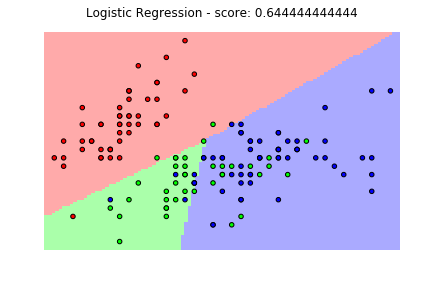

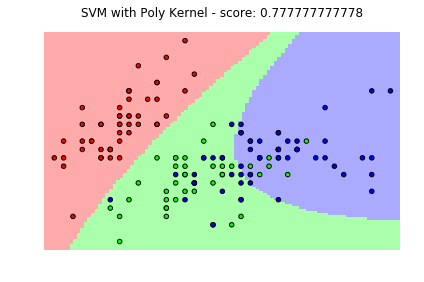

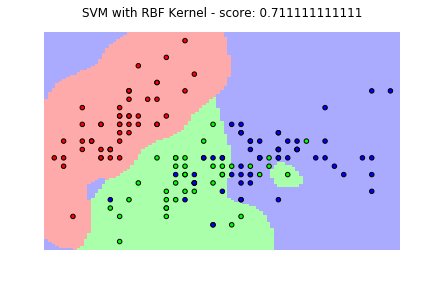

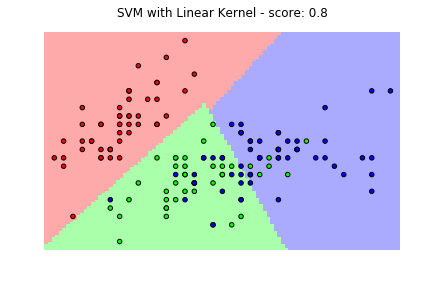

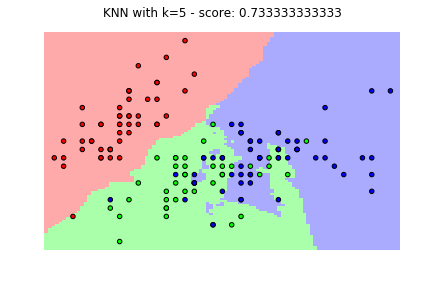

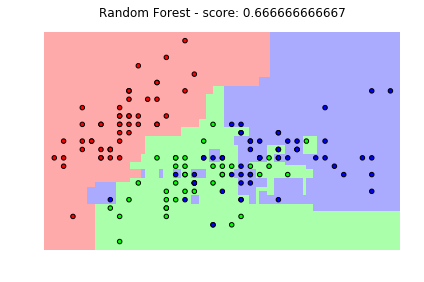

In [195]:
iris = datasets.load_iris()
compareWRTScore(iris.data[:,:2], iris.target)

### 2. Wine Classification

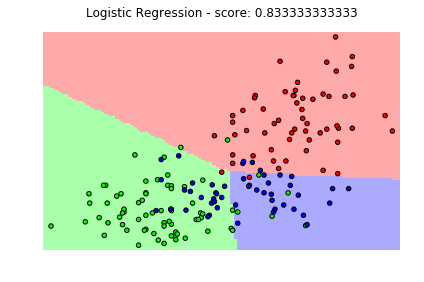

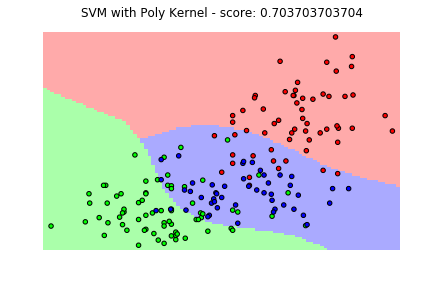

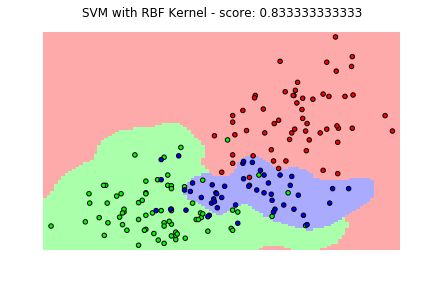

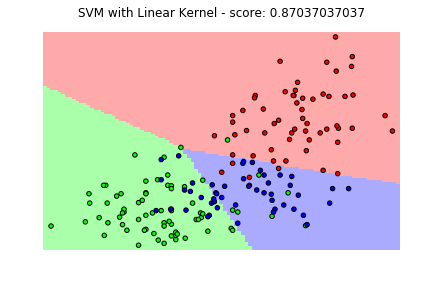

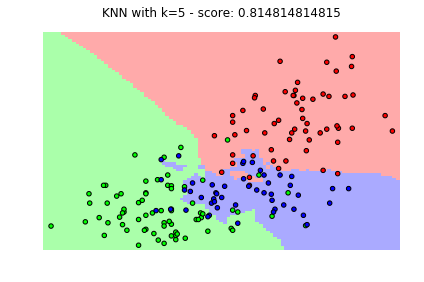

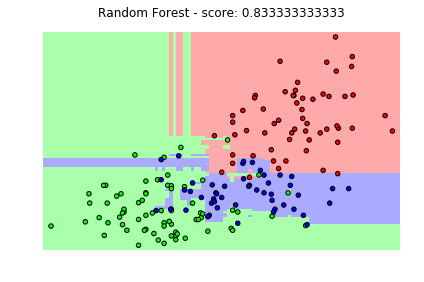

In [194]:
wine = pd.read_table("data/wine/wine.txt", sep='\s+')
attributes = ['Alcohol',
            'Malic acid',
            'Ash',
            'Alcalinity of ash',
            'Magnesium',
            'Total phenols',
            'Flavanoids',
            'Nonflavanoid phenols',
            'Proanthocyanins',
            'Color intensity',
            'Hue',
            'OD280/OD315 of diluted wines',
            'Proline']

grape = wine.pop('region')
y = grape.values
wine.columns = attributes
X = wine[['Alcohol', 'Proline']].values
compareWRTScore(X, y)

### 3. Not-linearly separable data

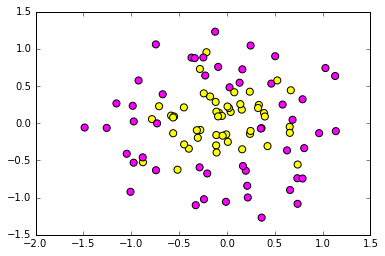

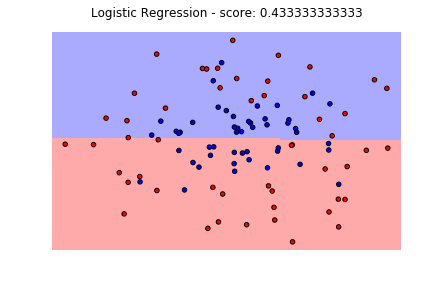

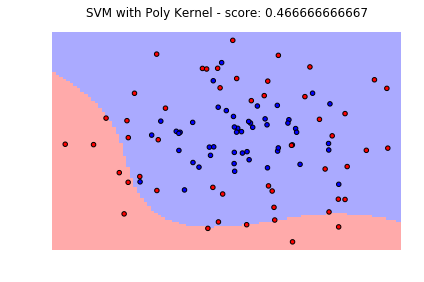

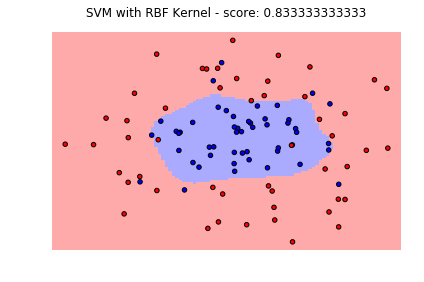

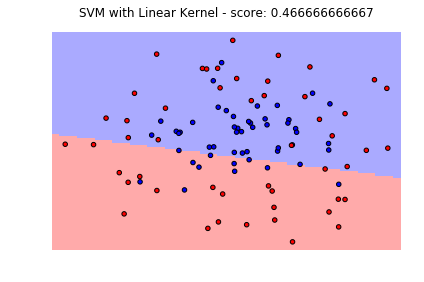

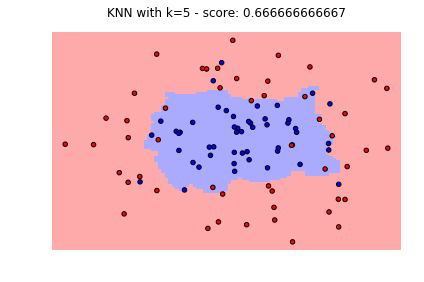

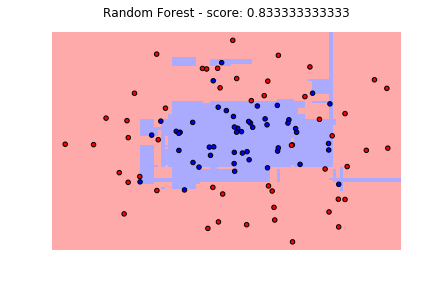

In [193]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.3, noise=.3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
compareWRTScore(X, y)

## Benchmark

In [172]:
results = compareWRTTime(X, y)

500 times training Logistic Regression with the data that has shape (70, 2) took 0.141763925552
15000 prediction with Logistic Regression took 0.450226068497

500 times training SVM with Poly Kernel with the data that has shape (70, 2) took 0.144801855087
15000 prediction with SVM with Poly Kernel took 0.711754083633

500 times training SVM with RBF Kernel with the data that has shape (70, 2) took 0.243014097214
15000 prediction with SVM with RBF Kernel took 0.771553993225

500 times training SVM with Linear Kernel with the data that has shape (70, 2) took 0.145947933197
15000 prediction with SVM with Linear Kernel took 0.699700117111

500 times training KNN with k=5 with the data that has shape (70, 2) took 0.115643024445
15000 prediction with KNN with k=5 took 4.2275891304

500 times training Random Forest with the data that has shape (70, 2) took 8.68138504028
15000 prediction with Random Forest took 8.41982007027



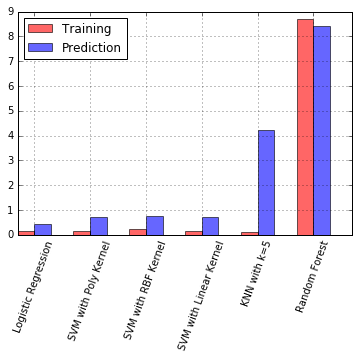

In [181]:
results = np.array(results)
index = np.arange(results.shape[0])

bar_width = 0.30
opacity = 0.6

rects1 = plt.bar(index, results[:, 1], bar_width, color="r", alpha=opacity)
rects2 = plt.bar(index + bar_width, results[:, 2], bar_width, color="b", alpha=opacity)
plt.legend((rects1[0], rects2[0]), ('Training', 'Prediction'), loc=2)
plt.xticks(index + bar_width, results[:,0], rotation=70)
plt.grid(True)

In [150]:
results[0, 1], results[0, 2]

('0.255414962769', '0.954820156097')